
# Does Good Behavior mean Good health?
### Introduction
The object of this project is to analyze the relationship between behavior and health in youths. This project will try to check if good behaviors have any impact on health condition of the youth. The BMI percentile will be used as a measure of health for the purpose of this project. The mental health will be explored using parameters such as suicidal thought.

## Data
The youth risk behavior surveillance system (YRBSS) monitors health-risk behaviors that contribute to the leading cause of death, disability and social problem among youth and adults in the united states. The YRBSS data is available at <http://www.cdc.gov/healthyyouth/data/yrbs/data.htm>.

### Get Data
The YRBSS website provides data in ASCII format. But, the file does not use separators to distinguish the fields. The file uses a fixed position for each field. This means the field widths needs to be provided manually.   

Let's load the data using the fixed with file read function read.fwf. The data file has more than 100 fields and after going over the data documentation a subset of those fields are considered for analysis. 

In [1]:
#Column width of variables
sel_widths = c(16,1 ,1 ,10,4 ,6,18,1 ,1 ,1 ,1 ,1 ,1 ,1 ,1 ,1 ,4,1 ,1 ,1 ,1 ,1 ,1 ,2 ,1 ,1 ,1 ,8 ,1 ,7 ,1 ,4 ,1 ,1 ,1 ,2,1 ,1,1 ,1 ,1 ,1 ,1 ,3 ,1 ,1 ,1 ,1 ,2 ,1,273,5)
#Name of the variables.
var_names = c("ignore","age","sex","ignore0","height","Weight","ignore1","felt_depressed","consider_suicide","plan_suicide","attempt_suicide","ignore2","ever_smoke","age_first_smoke","smoked_past30days","smoke_per_day","ignore3","chewing","ignore4","days_alcohol","first_drink_alcohol","alcohol_past30days","two_hour_drinks","ignore5","times_marijuana","first_marijuana","marijuana_past30days","ignore6","offered","ignore7","self_describe_weight","ignore8","drink_juice","eat_fruit","eat_green_salad","ignore8","eat_vegetables","ignore9","drink_milk","eat_breakfast","physical_activity","tv_hours","video_games_hours","ignore10","diagnosed_asthma","ignore11","exercise_past7days","tested_hiv","ignore12","avg_sleep","ignore13","BMIPCT")
file_loc = "https://raw.githubusercontent.com/mkds/MSDA/master/IS607/Project/data/yrbs2013.dat"
yb = read.fwf(file_loc,widths = sel_widths, col.names=var_names,stringsAsFactors=F)
dim(yb)

[1] 13583    52

### Shape Data
The YRBSS data is collected by surveying student with list of questions. The answer choice to the question are coded as a number in the data. So, we need to do some sanitization to ensure the data values are consistent.  

Let's remove the variables that are not required. The non-required variables are named with prefix "ignore" when the variables are named.

In [2]:
#Only keep the the columns that we are intrested in
yb = yb[-grep("ignore",var_names)]
str(yb)

'data.frame':	13583 obs. of  36 variables:
 $ age                 : int  3 3 4 4 4 4 4 3 4 4 ...
 $ sex                 : int  1 1 1 1 1 1 1 2 2 2 ...
 $ height              : chr  " .  " " .  " "1.73" "1.60" ...
 $ Weight              : chr  "   .  " "   .  " " 84.37" " 55.79" ...
 $ felt_depressed      : int  2 2 1 2 1 1 2 1 1 2 ...
 $ consider_suicide    : int  2 2 1 2 2 2 2 2 1 2 ...
 $ plan_suicide        : int  2 2 1 2 2 2 2 2 1 1 ...
 $ attempt_suicide     : int  1 1 2 1 1 1 NA NA 5 NA ...
 $ ever_smoke          : int  2 2 1 1 2 2 2 1 1 NA ...
 $ age_first_smoke     : int  1 1 2 1 1 1 1 4 1 NA ...
 $ smoked_past30days   : int  1 1 7 1 1 1 1 2 NA NA ...
 $ smoke_per_day       : int  1 1 3 1 1 1 1 2 NA NA ...
 $ chewing             : int  1 1 1 1 1 1 1 1 1 1 ...
 $ days_alcohol        : int  4 7 7 3 1 2 NA 2 1 NA ...
 $ first_drink_alcohol : int  2 5 2 5 1 6 6 2 2 1 ...
 $ alcohol_past30days  : int  1 4 7 2 1 1 NA 1 1 NA ...
 $ two_hour_drinks     : int  1 3 7 1 1 1 1 1 1 NA ...
 

Let's code the logical values as factors with meaningful labels

In [3]:
yb$felt_depressed = factor(yb$felt_depressed,levels=c(1,2),labels=c("depressed","not-depressed"))
yb$plan_suicide = factor(yb$plan_suicide,levels=c(1,2),labels=c("planned_suicide","No-suicide_plan"))
yb$diagnosed_asthma = factor(yb$diagnosed_asthma,levels=c(1,2),labels=c("diagnosed_asthma","Not-diagnosed_asthma"))
yb$ever_smoke = factor(yb$ever_smoke,levels=c(1,2),labels=c("Smoked","Never_Smoked"))
yb$self_describe_weight = factor(yb$self_describe_weight,levels=c(1,2,3,4,5),labels=c("Very UnderWeight","Slightly Underwight","Right weight","Slightly Overweight","Very overweight"))
yb$tested_hiv = factor(yb$tested_hiv,levels=c(1,2,3),labels=c("tested_HIV","Not-tested_HIV","Not sure of HIV"))

Due to invalid values the BMI column the data is not parsed with correct data type. Let's force it to have right data type.

In [4]:
yb$BMIPCT = as.double(yb$BMIPCT)
summary(yb)

Warning message:
In eval(expr, envir, enclos): NAs introduced by coercion

      age             sex           height             Weight         
 Min.   :1.000   Min.   :1.000   Length:13583       Length:13583      
 1st Qu.:4.000   1st Qu.:1.000   Class :character   Class :character  
 Median :5.000   Median :2.000   Mode  :character   Mode  :character  
 Mean   :5.157   Mean   :1.512                                        
 3rd Qu.:6.000   3rd Qu.:2.000                                        
 Max.   :7.000   Max.   :2.000                                        
 NA's   :77      NA's   :12                                           
       felt_depressed consider_suicide          plan_suicide   attempt_suicide
 depressed    :4086   Min.   :1.000    planned_suicide: 1874   Min.   :1.00   
 not-depressed:9409   1st Qu.:2.000    No-suicide_plan:11611   1st Qu.:1.00   
 NA's         :  88   Median :2.000    NA's           :   98   Median :1.00   
                      Mean   :1.833                            Mean   :1.15   
                      3rd Qu.:2.000  

As we could see from the summary many variables have missing entries. Let's remove the missing entries and keep the rows which have value for all the variables.

In [5]:
yb = yb[complete.cases(yb),]

Many variables have option to indicate a zero value. For example value 1 for variable smoked_past30days denotes that the respondent didn't smoke. Let's rescale them so that it becomes zero. 

In [6]:
yb$smoked_past30days = yb$smoked_past30days - 1
yb$attempt_suicide = yb$attempt_suicide - 1
yb$smoke_per_day = yb$smoke_per_day - 1
yb$chewing = yb$chewing - 1
yb$days_alcohol = yb$days_alcohol - 1
yb$alcohol_past30days = yb$alcohol_past30days - 1
yb$two_hour_drinks = yb$two_hour_drinks - 1
yb$times_marijuana = yb$times_marijuana - 1
yb$marijuana_past30days = yb$marijuana_past30days - 1
yb$offered = yb$offered - 1
yb$drink_juice = yb$drink_juice - 1
yb$eat_fruit = yb$eat_fruit - 1
yb$eat_green_salad = yb$eat_green_salad - 1
yb$eat_vegetables = yb$eat_vegetables - 1
yb$drink_milk = yb$drink_milk - 1
yb$eat_breakfast = yb$eat_breakfast - 1
yb$physical_activity = yb$physical_activity - 1
yb$tv_hours = yb$tv_hours - 1
yb$video_games_hours = yb$video_games_hours - 1
yb$exercise_past7days = yb$exercise_past7days - 1

## Exploratory Analysis
Now, the data is in the form that we could work with let's check some variables of interest. Let's check the relationship between Smoking habit and Suicidal thought.


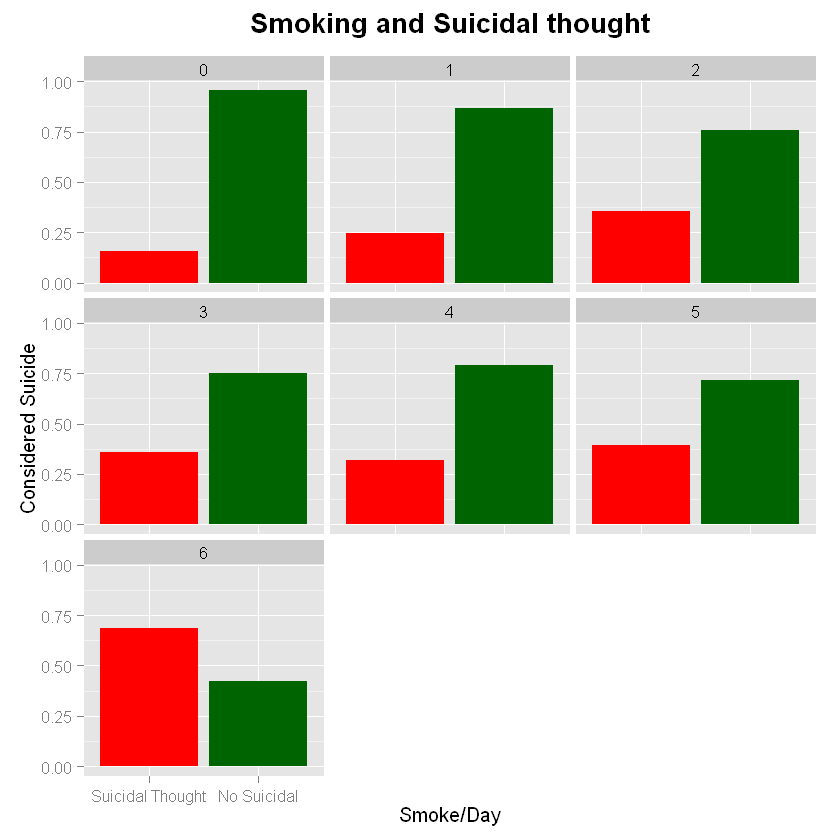

In [7]:
library(ggplot2)
title_theme = theme(plot.title = element_text(face = "bold",vjust = 2,size = 16))
 
ggplot(data=yb,aes(x=consider_suicide))+
  geom_bar(aes(y=..density..),fill=c("red","darkgreen"),binwidth=1,origin=-.5) +
  scale_x_discrete(breaks=c(1,2), labels=c("Suicidal Thought","No Suicidal"), limits=c(1,2)) +
  ylab("Considered Suicide") +
  xlab("Smoke/Day") +
  ggtitle("Smoking and Suicidal thought") + facet_wrap(~smoke_per_day) + 
  title_theme

The graph indicates a positive relationship between number of smokes per day and the suicidal thought. <font color="red"><b>It's alarming to see that about 70% of heavy smokers consider suicide at some point or other</b></font>

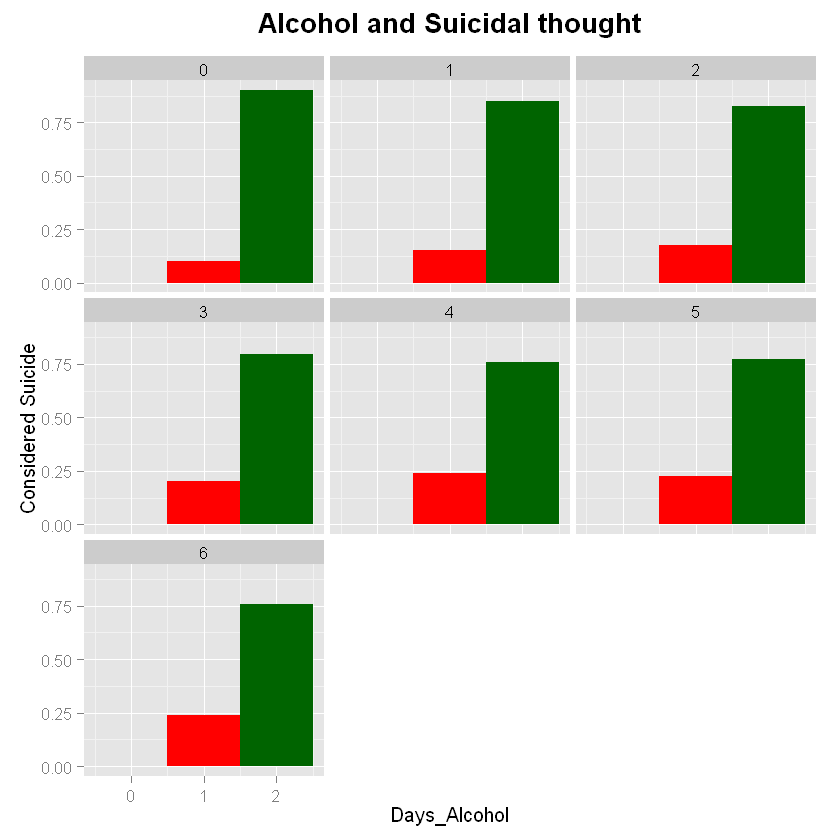

In [8]:
ggplot(data=yb,aes(x=consider_suicide)) +
  geom_bar(aes(y=..density..),fill=c("gray","red","darkgreen"),binwidth=1,origin=-.5) +
  ylab("Considered Suicide") +
  xlab("Days_Alcohol")+
  ggtitle("Alcohol and Suicidal thought") + facet_wrap(~days_alcohol) +
  title_theme

Alcohol also seems to have positive relationship with suicidal thought, but as strong as the smoke.  
   
Let's check the effect of Smoking on BMI

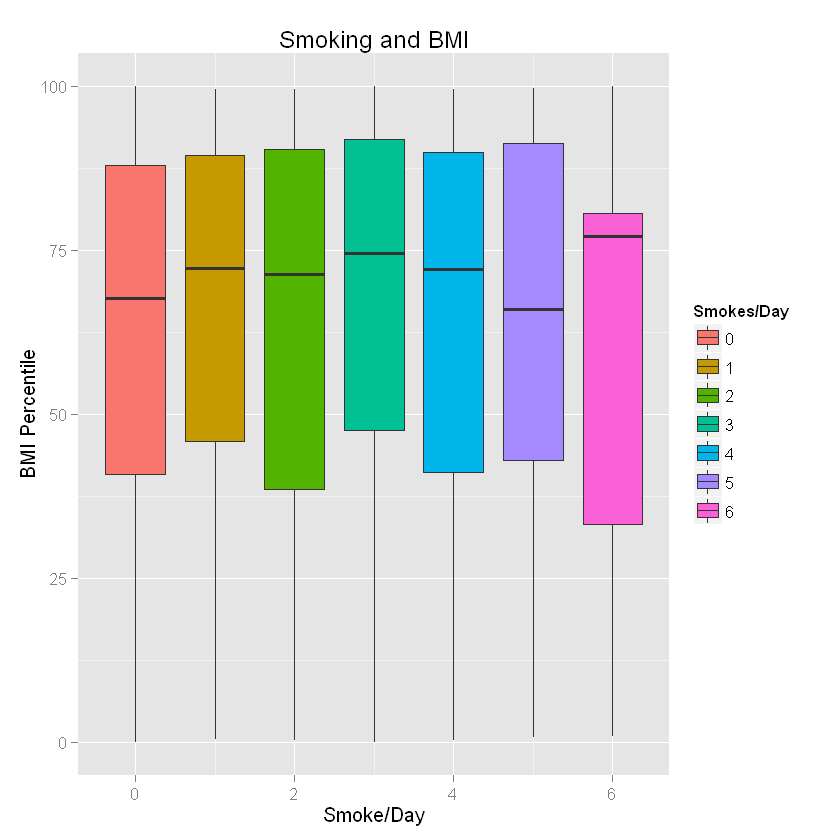

In [9]:
ggplot(data=yb,aes(y=BMIPCT)) +
  geom_boxplot(aes(x=smoke_per_day,fill=as.factor(smoke_per_day))) +
  ylab("BMI Percentile") +
  xlab("Smoke/Day")  +
  scale_fill_discrete(name="Smokes/Day") +
  ggtitle("Smoking and BMI") 

Smoking seems to have an effect on BMI. But with various categories it is not clear. Let's check the group which smokes less than two cigarette/day with the one which smokes mnore.

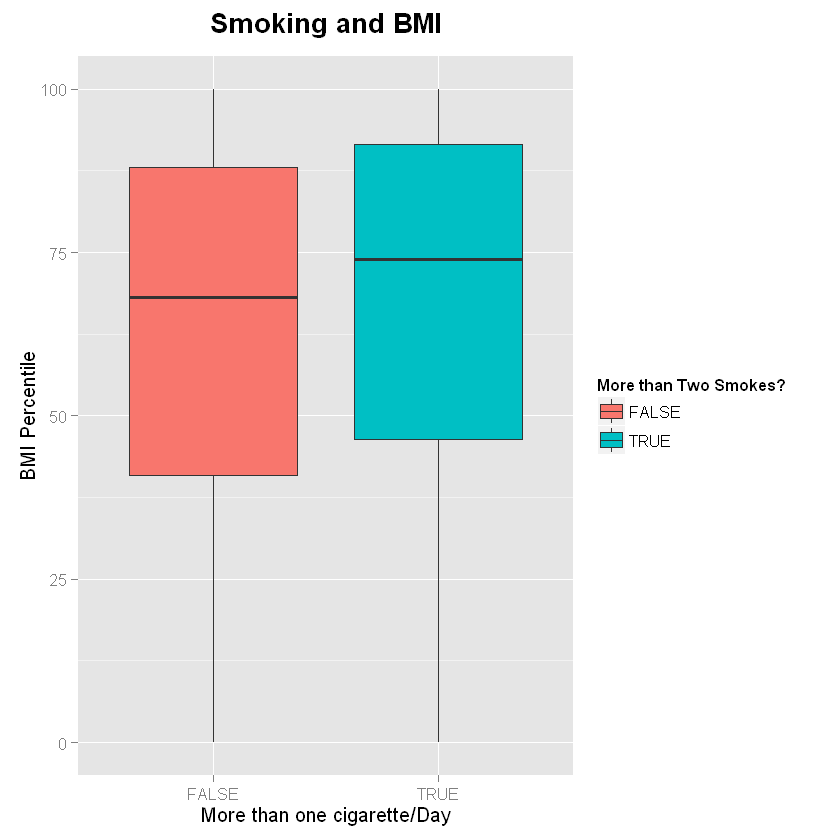

In [10]:
ggplot(data = yb,aes(y = BMIPCT)) +
  geom_boxplot(aes(x = smoke_per_day > 2,fill = as.factor(smoke_per_day > 2))) +
  ylab("BMI Percentile") +
  xlab("More than one cigarette/Day") +
  scale_fill_discrete(name="More than Two Smokes?") +
  ggtitle("Smoking and BMI") +
  title_theme

Now, we could clearly see that smoking increases BMI

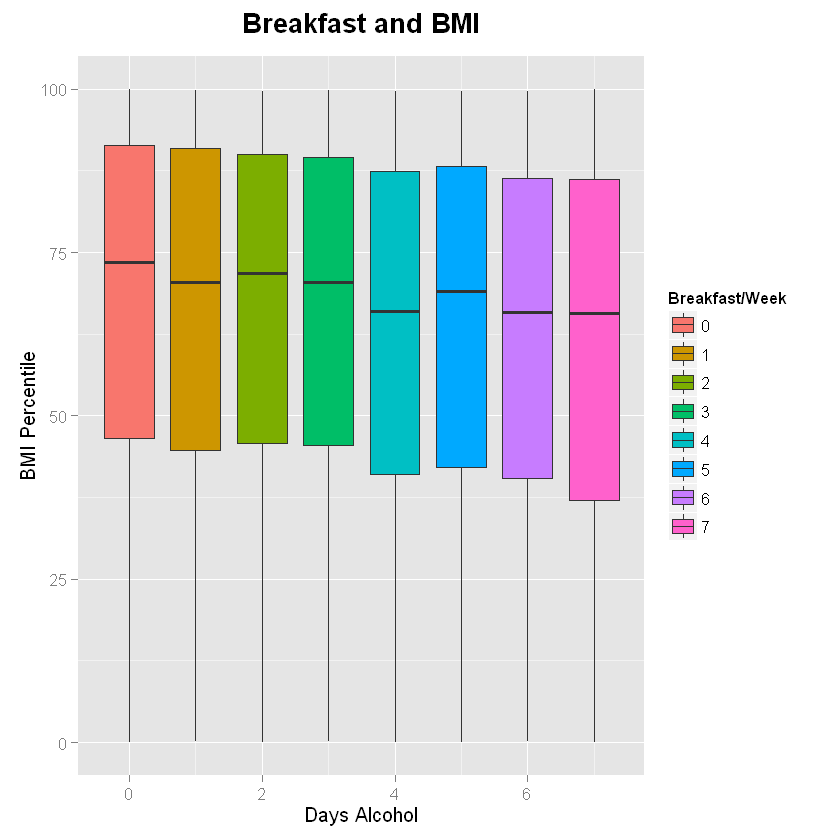

In [11]:
ggplot(data = yb,aes(y = BMIPCT)) +
  geom_boxplot(aes(x = eat_breakfast,fill = as.factor(eat_breakfast))) +
  ylab("BMI Percentile") +
  xlab("Days Alcohol") +
  scale_fill_discrete(name="Breakfast/Week") +
  ggtitle("Breakfast and BMI") + 
  title_theme

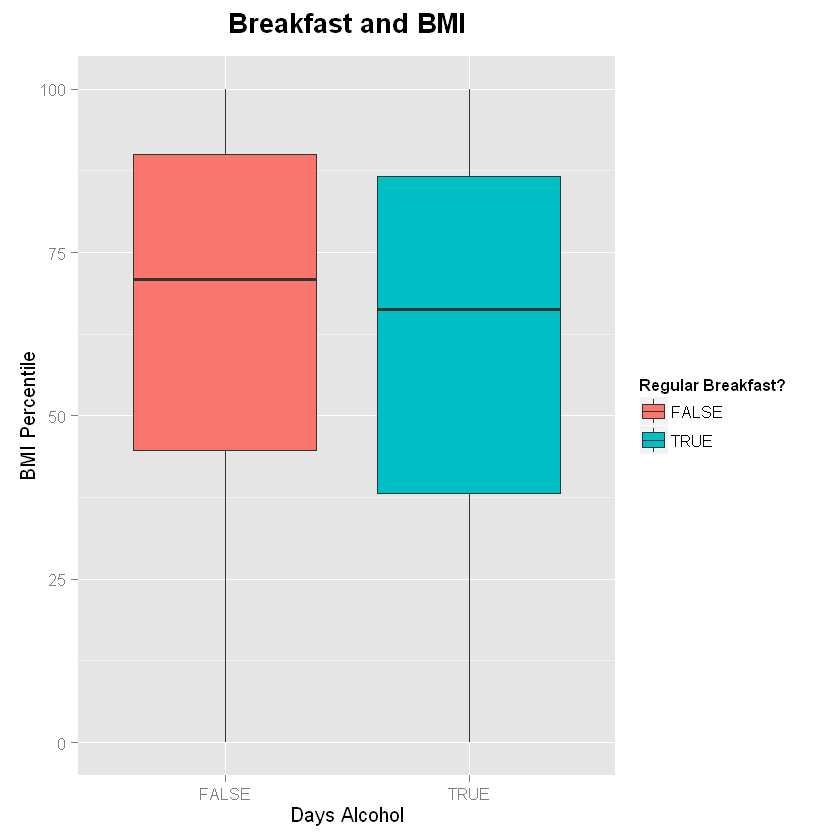

In [12]:
ggplot(data = yb,aes(y = BMIPCT)) +
  geom_boxplot(aes(x = eat_breakfast > 4,fill = as.factor(eat_breakfast > 4))) +
  ylab("BMI Percentile") +
  xlab("Days Alcohol") +
  scale_fill_discrete(name="Regular Breakfast?") +
  ggtitle("Breakfast and BMI") + 
  title_theme

In [13]:
yb$BMI_Weight = factor("Normal",levels = c("Normal","Overweight","Obese"))
yb$BMI_Weight[yb$BMIPCT > 85 & yb$BMIPCT < 95] = "Overweight"
yb$BMI_Weight[yb$BMIPCT >= 95] = "Obese"

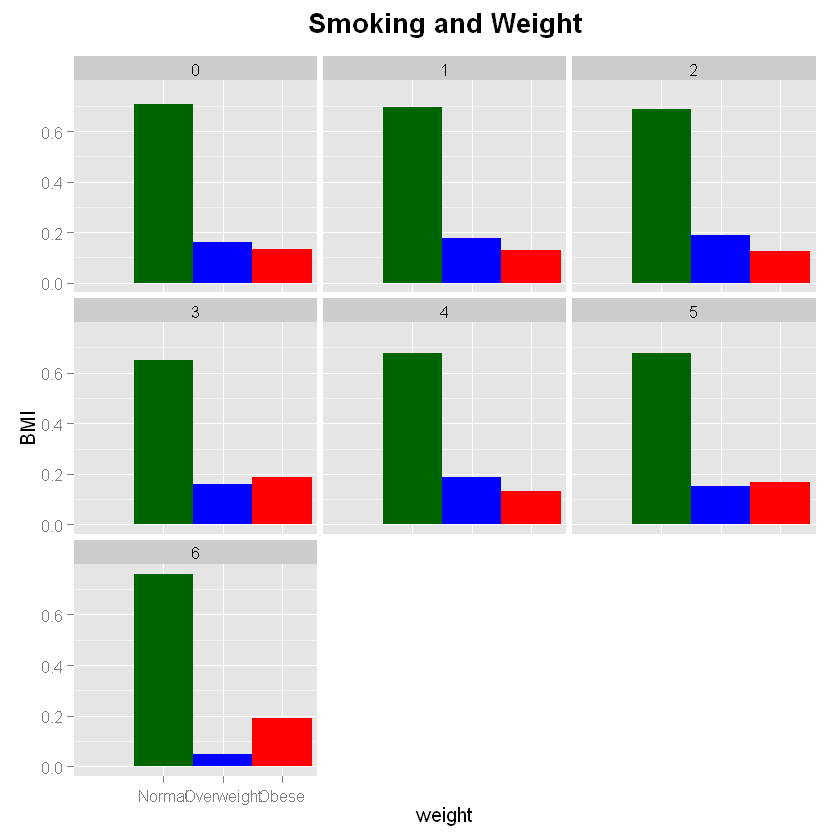

In [14]:
ggplot(data=yb,aes(x=as.numeric(BMI_Weight)))+
  geom_bar(aes(y=..density..),binwidth=1,origin=-.5,fill=c("gray","darkgreen","blue","red")) +
  scale_x_discrete(name="weight", breaks=c(1,2,3), labels=c("Normal","Overweight","Obese"), limits=c(1,2,3)) +
  ylab("BMI") +
  xlab("Smoke/Weight")+
  ggtitle("Smoking and Weight") + 
  facet_wrap(~smoke_per_day) +
  title_theme

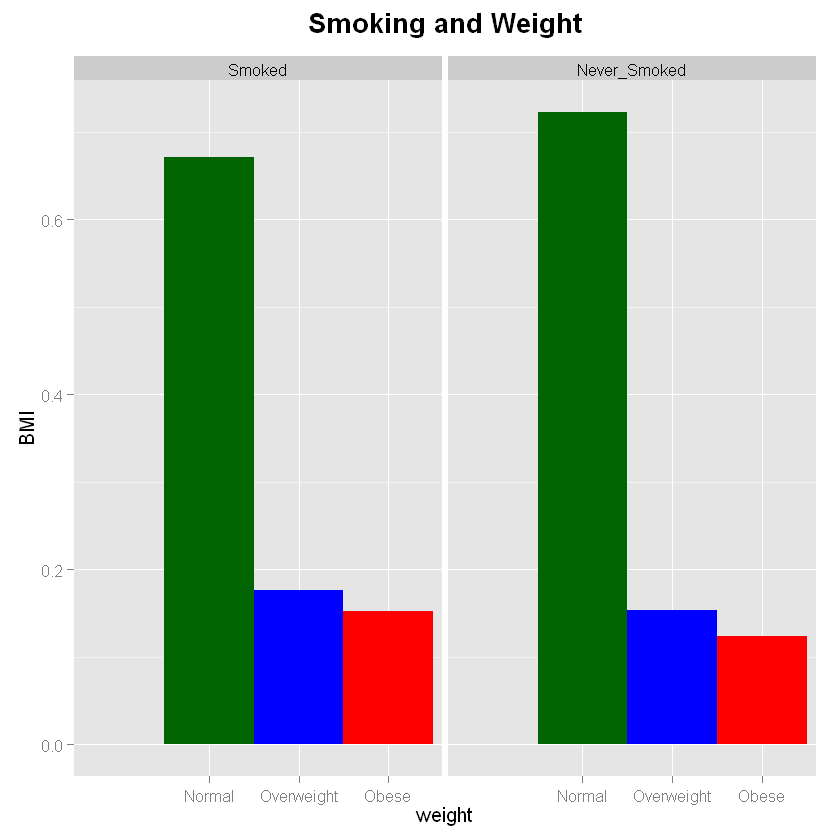

In [15]:
ggplot(data=yb,aes(x=as.numeric(BMI_Weight)))+
  geom_bar(aes(y=..density..),binwidth=1,origin=-.5,fill=c("gray","darkgreen","blue","red")) +
  scale_x_discrete(name="weight", breaks=c(1,2,3), labels=c("Normal","Overweight","Obese"), limits=c(1,2,3)) +
  ylab("BMI") +
  xlab("Smoke/Weight")+
  ggtitle("Smoking and Weight") + 
  facet_wrap(~ever_smoke) +
  title_theme

## Hypothesis testing
In order to check if the good or bad behavior have any effect on health we could conduct simple statistical tests. We shall use student t-test to check if the effect of behavior on health (i.e. BMI) is significant or not. Given that there are many variables that used to represent a good or bad behavior make it difficult to conduct the t-test. In order to simplify the process let's create summary data by combining multiple same natured variable into one. 

In [16]:
yb_summary = NULL
yb_summary$BMIPCT = yb$BMIPCT
yb_summary$good_eat = yb$eat_fruit + yb$eat_green_salad + yb$eat_breakfast + yb$eat_vegetables + yb$drink_milk + yb$drink_juice
yb_summary$bad_eat = yb$smoke_per_day + yb$days_alcohol + yb$alcohol_past30days + yb$chewing + yb$times_marijuana
yb_summary$physical_good = yb$physical_activity + yb$exercise_past7days + yb$avg_sleep
yb_summary$physical_bad = yb$tv_hours + yb$video_games_hours  
yb_summary = as.data.frame(yb_summary)

 Once we create summary dataset, we need to split the data into two groups on which we like to conduct t-test. Let's look at the summary to see how the data looks like so that we can identify values that we can use to separate two groups

In [17]:
summary(yb_summary)

     BMIPCT         good_eat        bad_eat       physical_good  
 Min.   : 0.00   Min.   : 0.00   Min.   : 0.000   Min.   : 1.00  
 1st Qu.:41.35   1st Qu.: 9.00   1st Qu.: 0.000   1st Qu.: 7.00  
 Median :68.33   Median :13.00   Median : 2.000   Median :11.00  
 Mean   :62.75   Mean   :13.16   Mean   : 4.642   Mean   :10.63  
 3rd Qu.:88.39   3rd Qu.:17.00   3rd Qu.: 7.000   3rd Qu.:15.00  
 Max.   :99.95   Max.   :37.00   Max.   :30.000   Max.   :21.00  
  physical_bad   
 Min.   : 0.000  
 1st Qu.: 4.000  
 Median : 6.000  
 Mean   : 5.783  
 3rd Qu.: 8.000  
 Max.   :12.000  

### Student T-Test to check effect of Smoking and Drinking Alcohol on BMI
The bad_eat variable represents habits such as smoking, drinking alcohol, taking drugs etc. In order to see if these habits have implication on BMI we can split the group into two. One group which does not take any drugs and another one which takes. We could then conduct a student t-test to see if the difference in BMI between two groups are significant or not.

In [18]:
#Compare the groups with bad food habbits with one with no bad habbits
t.test(yb_summary$BMIPCT[yb_summary$bad_eat>0],yb_summary$BMIPCT[yb_summary$bad_eat==0])



	Welch Two Sample t-test

data:  yb_summary$BMIPCT[yb_summary$bad_eat > 0] and yb_summary$BMIPCT[yb_summary$bad_eat == 0]
t = 3.9031, df = 4429, p-value = 9.639e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.373068 4.144557
sample estimates:
mean of x mean of y 
 63.57063  60.81182 


 <font color="purple">The p-value of the test is less than 0.0001. So, the test indicates that the effect of Smoking and Alcohol on BMI is statistically significant. So people who smoke or take alcohol do tend to have higher BMI compared to people who don't take them</font>   
   
---  

### Student T-Test to check effect of good eating habits (taking fruits, vegetables, eating breakfast etc.) on BMI
The variable good_eat indicates good food behavior. The median value for this variable is 13. Let's spilt the data into two groups one which falls below the median line and the one which falls above the median line.

In [19]:
t.test(yb_summary$BMIPCT[yb_summary$good_eat<13],yb_summary$BMIPCT[yb_summary$good_eat>=13])


	Welch Two Sample t-test

data:  yb_summary$BMIPCT[yb_summary$good_eat < 13] and yb_summary$BMIPCT[yb_summary$good_eat >= 13]
t = 1.927, df = 8079, p-value = 0.05401
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.0212026  2.4810436
sample estimates:
mean of x mean of y 
 63.37862  62.14870 


 <font color="purple">The p-value of the test is not less than .05. So, the test indicates that the effect of good eating habit on BMI is not statistically significant. </font>  
 Let's re-conduct the test by eliminating the cases which have both good and bad food habits (i.e. by removing cases where people smoke or take alcohol)

In [20]:
t.test(yb_summary$BMIPCT[yb_summary$good_eat<13 & yb_summary$bad_eat==0],yb_summary$BMIPCT[yb_summary$good_eat>=13 & yb_summary$bad_eat==0])


	Welch Two Sample t-test

data:  yb_summary$BMIPCT[yb_summary$good_eat < 13 & yb_summary$bad_eat ==  and yb_summary$BMIPCT[yb_summary$good_eat >= 13 & yb_summary$bad_eat ==     0] and     0]
t = 2.3737, df = 2215.2, p-value = 0.01769
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.5006738 5.2587791
sample estimates:
mean of x mean of y 
 62.44027  59.56054 


<font color="purple">Now the p-value of the test is about .01. So, the test indicates that the effect of good eating habits on BMI is statistically significant. <b>This shows that the good eating habits have effect on BMI only if the person is not smoking and not taking alcohol or other drugs.</b> </font>  
  
---  
  
### Student t-test to check the effect of physical activity, exercise on BMI  

In [21]:
t.test(yb_summary$BMIPCT[yb_summary$physical_good<11],yb_summary$BMIPCT[yb_summary$physical_good>=11])


	Welch Two Sample t-test

data:  yb_summary$BMIPCT[yb_summary$physical_good < 11] and yb_summary$BMIPCT[yb_summary$physical_good >= 11]
t = 1.625, df = 8054.6, p-value = 0.1042
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2139605  2.2877601
sample estimates:
mean of x mean of y 
 63.26634  62.22944 


 <font color="purple">The p-value of the test is not less than .05. So, the test indicates that the effect is not statistically significant. </font>  
 Let's re-conduct the test by eliminating the cases which have bad food habits (i.e. by removing cases where people smoke or take alcohol)

In [22]:
t.test(yb_summary$BMIPCT[yb_summary$physical_good<11  & yb_summary$bad_eat==0],yb_summary$BMIPCT[yb_summary$physical_good>=11  & yb_summary$bad_eat==0])


	Welch Two Sample t-test

data:  yb_summary$BMIPCT[yb_summary$physical_good < 11 & yb_summary$bad_eat ==  and yb_summary$BMIPCT[yb_summary$physical_good >= 11 & yb_summary$bad_eat ==     0] and     0]
t = 1.1136, df = 2362, p-value = 0.2656
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.018133  3.693911
sample estimates:
mean of x mean of y 
 61.50391  60.16602 


 <font color="purple">The p-value of the test is still not less than .05. So, the test indicates that the effect is not statistically significant. </font>    
   
---   
### Student t-test to check the effect of watching TV and video game on BMI  


In [23]:
t.test(yb_summary$BMIPCT[yb_summary$physical_bad<6],yb_summary$BMIPCT[yb_summary$physical_bad>=6])


	Welch Two Sample t-test

data:  yb_summary$BMIPCT[yb_summary$physical_bad < 6] and yb_summary$BMIPCT[yb_summary$physical_bad >= 6]
t = -2.6599, df = 8105.5, p-value = 0.007831
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.9423696 -0.4455863
sample estimates:
mean of x mean of y 
 61.86179  63.55577 


<font color="purple">The p-value of the test is less than 0.05. So, the test indicates that the effect is statistically significant.<b> So people who spend more time on watching television and/or playing video games tend to have higher BMI </b></font>   
   
--- 
 
## Statistical Model 
Let's try to build a predictive model and analyze the model to study the impact of habits on BMI. In order to identify the variable of importance and their impact on the BMI percentile let's build a linear model. Linear model is selected for regression as it is easier to understand and interpret linear models.

In [24]:
bmipct_model = lm(BMIPCT~.,data = yb_summary)
summary(bmipct_model)


Call:
lm(formula = BMIPCT ~ ., data = yb_summary)

Residuals:
    Min      1Q  Median      3Q     Max 
-66.728 -21.573   5.827  25.610  40.463 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   61.61017    1.19818  51.420  < 2e-16 ***
good_eat      -0.09819    0.05594  -1.755 0.079247 .  
bad_eat        0.19495    0.05768   3.380 0.000729 ***
physical_good -0.01496    0.06982  -0.214 0.830316    
physical_bad   0.29078    0.10745   2.706 0.006822 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 28.7 on 8112 degrees of freedom
Multiple R-squared:  0.003031,	Adjusted R-squared:  0.002539 
F-statistic: 6.165 on 4 and 8112 DF,  p-value: 5.98e-05


<font color="purple">From the model summary we could see that the bad_eat which represent smoking and alcohol as well as physical_bad which represent watching TV and playing video game are significant in the model. Both of them have a positive coefficient which indicates that they positively affect BMI. As expected we could see that good_eating habit negatively affects BMI moving it towards 50 percentile range.</font>  

---  

    
## Conclusion   
---    
    
       
<font color="mediumblue" size=3> By analyzing the data from the YRBSS data we could conclude that the effect of youth behavior on health is statistically significant. All three analysis - visual analysis, hypothesis testing and statistical model indicate that bad behavior increases BMI and so negatively affect health. Though good behavior has beneficial effect on BMI the effect is only visible in the absence of bad behavior.</font>